# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline
from matplotlib.transforms import Bbox

In [2]:
import PIL.Image as Image
import pickle

In [3]:
rc('text',usetex=True)
# rc('text.latex',preamble=r'\usepackage{amssymb}')
rc('text.latex',preamble='''\\usepackage{amssymb}\n\\usepackage{siunitx}\n\DeclareSIUnit\Molar{\\textsc{m}}\n
\def\\V{\\textrm{V}}\n
\def\\A{\\textrm{A}}
\def\\C{\\textrm{C}}
\def\\R{\\textrm{R}}
\def\\t{\\textrm{t}}
''')

rcParams['savefig.pad_inches'] = 0


In [4]:
redcolor = '#dd1c77' # actually magenta

In [5]:
SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

rc('font',size = BIGGER_SIZE,family = 'Arial')
rc('axes',titlesize = BIGGER_SIZE)
rc('axes',labelsize = BIGGER_SIZE)
rc('xtick',labelsize = BIGGER_SIZE)
rc('ytick',labelsize = BIGGER_SIZE)
rc('legend',handlelength= 1.0,fontsize = MEDIUM_SIZE)
rc('figure',titlesize = BIGGER_SIZE)

In [6]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
    
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [8]:
def numbering_panels(axs,pos = None,labels=alphabet):
    if pos is None:
        pos = zeros((len(axs),2))
        pos[:,1] = 1-pos[:,1]
        
    for i,ax in enumerate(axs):
        ax.text(pos[i,0],pos[i,1],labels[i],horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    return

In [9]:
def plot_trace(data,t,ax=None,c='C0',band= None,label= None,linestyle='-'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    sh = vtracso.shape[1]
    nmed = sh//2
    nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
    nl2, nv2 = int(sh*0.025),int(sh*(1-0.025))

    if label is None:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle)
    else:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle,label=label)
        
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,nl2],vtracso[:,nv2],color=c,alpha=0.5)
    else:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv2],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    return(ax)

# Scale bars
def scalebar(ax,x0,y0,dx,dy,xlab = '', ylab = '', color = 'k'):
    xs = x0+linspace(0,dx,4)
    ax.vlines(x0,y0,y0+dy,color = color)
    ax.plot(xs,xs*0+y0,c = color)
    ax.text(x0,y0+dy*.3,ylab,horizontalalignment="right")   
    ax.text(x0+dx/2,y0-dy*0.02,xlab,verticalalignment="top",horizontalalignment="center")     

def running_mean(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
    return(runmean)
def running_std(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        cumsumt = cumsum(concatenate((zeros(1),x*x,zeros(N-1))))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runstd[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        runstd = sqrt(runstd-runmean**2)
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        
        cumsumt = cumsum(insert(x**2, 0, 0))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        runstd = sqrt(runstd-runmean**2)
    return(runstd)

In [10]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0.2,1.0),direction=1)

#plot(randn(5))
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]]}
newcmp = LinearSegmentedColormap('Magentas', segmentdata=cdict, N=256)

plt.register_cmap(cmap=newcmp)

def plot_syninputs(fig,ax):
    xs = linspace(0,120,1000)
    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)


    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1.015,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1.015*2,'g-',linewidth= 2,label='GABA')
    #gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))
    #gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


    ax.set_aspect('auto')
    ax.set_xlim(-2,50)
    ax.set_ylim(-2.1,1.15)
    ax.set_xlabel('t (\si{\milli\second})')
    ax.set_ylabel('$\\textrm{G}/\\textrm{G}_{max}$',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
    ax.yaxis.set_label_coords(0,1.05)
    #     ax.legend()   
    ax.annotate('NMDA',xy = (40,0.16))
    ax.annotate('AMPA',xy = (40,-0.95))
    ax.annotate('GABA',xy = (40,-1.88))

In [15]:
#Jupyters: Proper Spine Model v2 - Main experiments
folderstore = '/mnt/data/spinemodel/'
with open(folderstore+"All_baseline_datasetv3_nosh.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open(folderstore+"All_baseline_depinhv3_nosh.pickle","rb") as f:
    messh,iPSDsh,posish,mesDiSI,spdataI = pickle.load(f)
   
        


#n = 800
#sel = mVb[:,-2] == 1
#s1 = arange(mVs.shape[0])[sel]
#s2 = arange(mVs.shape[0])[~sel]
#xt,yt = mVb[s1,-1],mVb[s1,2]
#sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtSiS = running_mean(xt,n)
# #yt2 = running_std(yt,n)
# ytSiS = running_mean(yt,n)

# xt,yt = mVb[s2,-1],mVb[s2,2]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# nDiS = 200
# xtDiS = running_mean(xt,nDiS)
# #yt2 = running_std(yt,n)
# ytDiS = running_mean(yt,nDiS)

# xt,yt = mVbI[:,-1],mVbI[:,2]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtspI = running_mean(xt,n)
# ytspI = running_mean(yt,n)

# xt,yt = mVbI[:,-1],mVbI[:,5]
# sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
# xtshI = running_mean(xt,n)
# #yt2 = running_std(yt,n)
# ytshI = running_mean(yt,n)


In [16]:
modeldt = 0.05
bands = 1

1.7153111968667247 0.3443133217351895


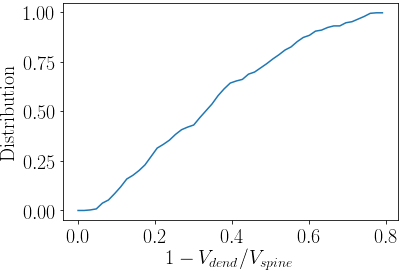

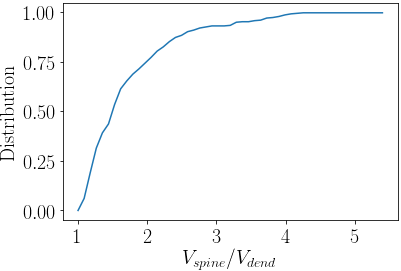

In [17]:
spden = (1-mesT[:,2]/mesT[:,1])
densp = (mesT[:,1]/mesT[:,2])

p = linspace(0,0.79,51)
prob = zeros(p.shape[0])
prob = [(spden<pt).sum()/mesT.shape[0] for pt in p]
plot(p,prob)

xlabel('$1-V_{dend}/V_{spine}$')
ylabel('Distribution')
figure()
p = linspace(1,max(densp),51)
prob = zeros(p.shape[0])
prob = [(densp<pt).sum()/mesT.shape[0] for pt in p]
plot(p,prob)
xlabel('$V_{spine}/V_{dend}$')
ylabel('Distribution')
print(densp.mean(),spden.mean())

In [18]:
mesT[densp>5,1:3],dataT['Rneck'][densp>5],dataT['Ln'][densp>5],dataT['minDneck'][densp>5]

(array([[8.61284933, 1.5946526 ]]), spID
 180609DDT4_F    483.484543
 Name: Rneck, dtype: float64, spID
 180609DDT4_F    3.54271
 Name: Ln, dtype: float64, spID
 180609DDT4_F    57.491339
 Name: minDneck, dtype: float64)

(array([124., 138.,  54.,  26.,  20.,   6.,   8.,   1.,   0.,   1.]),
 array([ 39.71187943,  92.65266617, 145.5934529 , 198.53423963,
        251.47502637, 304.4158131 , 357.35659984, 410.29738657,
        463.2381733 , 516.17896004, 569.11974677]),
 <a list of 10 Patch objects>)

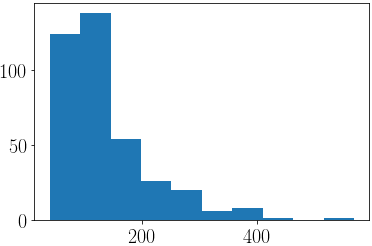

In [19]:
hist(dataT['minDneck'])

0.0 -0.35061143424877694
0.10555555555555556 -0.3491086430437369
0.2111111111111111 -0.3473673408091036
0.31666666666666665 -0.3453210485351093
0.4222222222222222 -0.34287199044568684
0.5277777777777778 -0.33986728900769125
0.6333333333333333 -0.33604616708098595
0.7388888888888889 -0.3308993966047985
0.8444444444444444 -0.3231594515478378
0.95 -0.3070738755420433
168.73523715875115 0.2810529486143622 -0.35061143424877694


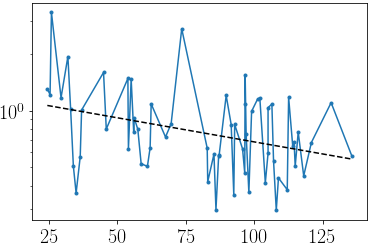

In [20]:
from scipy.stats import linregress

xt = 1.0*posish
#xt = linspace(min(xt),max(xt))
yt = 1.0*messh[:,3]
sel = xt.argsort()
yt = yt[sel]
xt = xt[sel]
for dt in linspace(0.,0.95,10):
    miny = min(yt)*dt
    ytb = log(yt-miny)
    slope, intercept, r_value, p_value, std_err = linregress(xt,ytb)
    print(dt,r_value)

plot(xt,yt,'.-')
yt = log(yt)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny,r_value)
yscale('log')

0.95 -0.2882339666782804
0.9544444444444444 -0.2883007207269617
0.9588888888888889 -0.2883644243462833
0.9633333333333333 -0.2884243247634379
0.9677777777777777 -0.2884794402053632
0.9722222222222222 -0.2885284563156726
0.9766666666666667 -0.2885695447558637
0.981111111111111 -0.2885999976095563
0.9855555555555555 -0.2886153115674949
0.99 -0.2886060071785736
85.00257663085546 0.027539541969375775 -0.2884456157331923


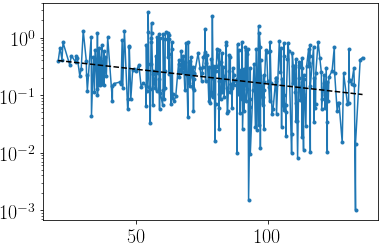

In [21]:
#xt = linspace(min(xtSis),max(xtSis))

sel = dataT['nPSD']==1.0
xt = 1.0*dataT['Dss'][sel]
#xt = linspace(min(xt),max(xt))
yt = 1.0*mesT[sel,3]
sel = xt.argsort()
yt = yt[sel]
xt = xt[sel]
for dt in linspace(0.95,0.99,10):
    miny = min(yt)*dt
    ytb = log(yt-miny)
    slope, intercept, r_value, p_value, std_err = linregress(xt,ytb)
    print(dt,r_value)

miny = min(yt)*.965
ytb = yt-miny
plot(xt,ytb,'.-')
yt = log(ytb)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny,r_value)
yscale('log')

In [22]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0.35,1.0),direction=1)

#plot(randn(5))
#ax = gca()
#ax.set(autoscale_on=False)
#gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')  

In [23]:
from matplotlib.colors import LinearSegmentedColormap

In [24]:
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.5, 0.5],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]]}
newcmp = LinearSegmentedColormap('Magentas', segmentdata=cdict, N=256)

plt.register_cmap(cmap=newcmp)

def plot_syninputs(fig,ax):
    xs = linspace(0,120,1000)
    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)


    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
    gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))
    gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


    ax.set_aspect('auto')
    ax.set_xlim(-2,100)
    ax.set_ylim(-2.1,1.5)
    ax.set_xlabel('$t$ (ms)')
    ax.set_ylabel('$G/G_{max}$')
    ax.yaxis.set_label_coords(-0.03,0.4)
    ax.legend()
    ax.annotate('$\Delta t$',xy = (7,1.1))
    ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
    ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

AMPA 0.3060393626007704
1.7592400249976667
AMPA 0.3060393626007704
1.7592400249976667


Text(20, 1.15, '')

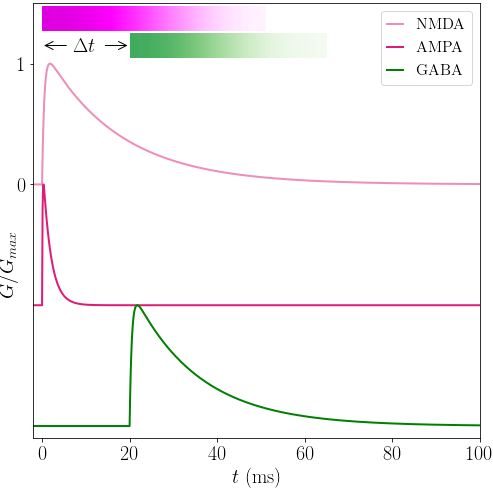

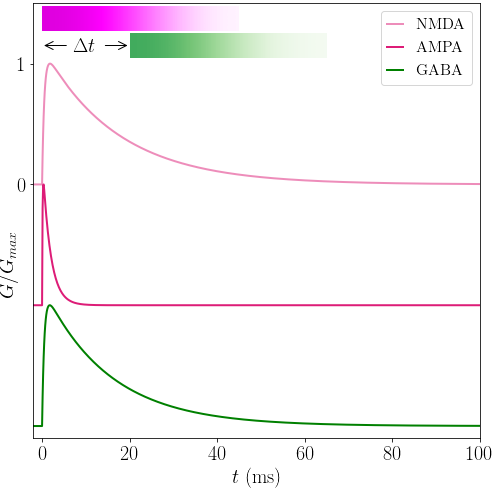

In [21]:
figure(figsize=(8,8))

xs = linspace(0,120,1000)

ton, toff = (0.5,17.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
ax = gca()
ax.set(autoscale_on=False)

gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)



ton, toff = (0.1,1.8)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

ton, toff = (0.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))



ax.set_aspect('auto')

ax.set_xlim(-2,100)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

# savefig('conductances3.pdf')
figure(figsize=(8,8))

xs = linspace(0,120,1000)
ton, toff = (0.5,17.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
ax = gca()
ax.set(autoscale_on=False)


ton, toff = (0.1,1.8)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'-',c=redcolor,linewidth= 2,label='AMPA')

ton, toff = (0.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))

gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = newcmp)


ax.set_aspect('auto')

ax.set_xlim(-2,100)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

# savefig('conductances2.pdf')

In [22]:

def plot_syninputsdelta(fig,ax):
    xs = linspace(0,120,1000)

    ton, toff = (0.5,17.0)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'-',c=redcolor,linewidth= 2,alpha=0.5,label='NMDA')
    ax.set(autoscale_on=False)

    dy = 0.05
    gradient_bar(ax,[0],[1.25+.2-dy],2*toff,1.25-dy,cmap = newcmp)



    ton, toff = (0.1,1.8)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
    ax.plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1.015,'-',c=redcolor,linewidth= 2,label='AMPA')

    ton, toff = (0.5,15.0)
    trise = ton*toff/(ton-toff)*log(ton/toff)
    ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
    ax.plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1.015*2,'g-',linewidth= 2,label='GABA')
    gradient_bar(ax,[20],[1.23-dy],2*toff,1.03-dy,cmap = cm.Greens_r)
    ax.set_yticks(ticks=array([0,1.]))



    ax.set_aspect('auto')

    ax.set_xlim(-2,70)
    ax.set_ylim(-2.1,1.6)
    ax.set_xlabel('t (\si{\milli\second})')
    ax.set_ylabel('$\\textrm{G}/\\textrm{G}_{max}$',rotation=0, 
               horizontalalignment='left',
               verticalalignment='top')
    ax.yaxis.set_label_coords(0,1.05)
    ax.vlines(20,-1.015*2,1.03-dy,linestyle='--')
    #ax.legend(loc = (0.6,.885))
    ax.annotate('$\Delta \\t$',xy = (6.5,1.05-dy))
    ax.annotate('NMDA',xy = (50,0.1))
    ax.annotate('AMPA',xy = (50,-0.95))
    ax.annotate('GABA',xy = (50,-1.85))
    ax.annotate('',xy = (6,1.13-dy),xytext = (0,1.13-dy),arrowprops=dict(arrowstyle="<-"))
    ax.annotate('',xy = (14,1.13-dy),xytext = (20,1.13-dy),arrowprops=dict(arrowstyle="<-"))

In [23]:
#Jupyter notebook: Proper Spine Model - Inhibition.ipynb
data = {}

with open("../SpineModel/dis_baselinev3_nosh.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05v3_nosh.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05v3_nosh.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_v3_nosh.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open("inhibition_v3_outPSD_nosh.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


In [24]:
#From notebook: Proper Spine Model - Gating info 2
#with open("gatinginfo_0_temp.pickle","rb") as f:
#    fapS,fapD,fap0,fapC = pickle.load(f)
#with open("gatinginfo_u.pickle","rb") as f:
#    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfov3_temp.pickle","rb") as f:
    #with open("gatinginfo_f_bRx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
#with open("gatinginfo_h.pickle","rb") as f:
#    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)

#From notebook: Electrotonic Figures + Proper Spine Model - Gaing Info2 - Electrotonic revisited
with open("gatinginfo_lengthv3.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

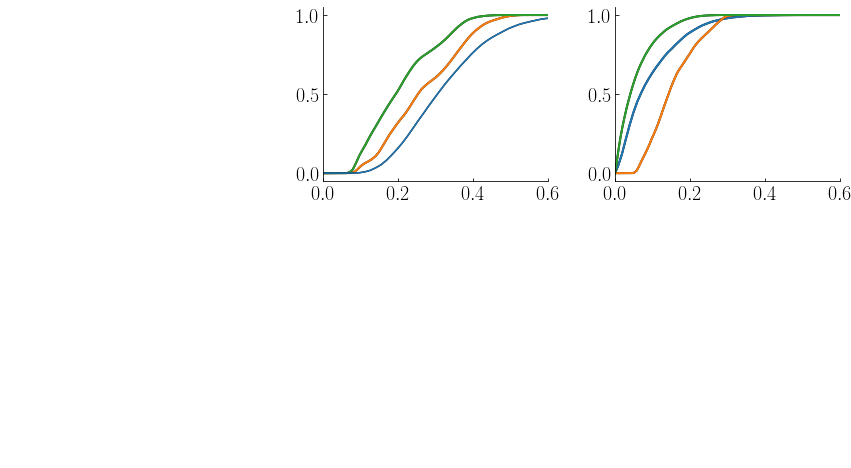

In [41]:
im = Image.open('../dendintem2.png')
im2 = Image.open('../legend2.png')

fig = figure(figsize=(14.5,8))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.3, hspace=0.5) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col
#axl0 = fig.add_subplot(gs[1, 0]) # first full col

ax2 = fig.add_subplot(gs[0, 1]) # first row, second col
ax1 = fig.add_subplot(gs[0, 2]) # first row, third col
ax4 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax3 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col
#axl1 = fig.add_subplot(gs[1, 0]) # lower row, 1st col

color = redcolor
xt = -arange(0,10)*7.5
#axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color=color)
#axl1.plot(xt,mt,'k.-',linewidth=2)
#axl1.plot(xt,mt,color+'.-',label='Excitatory EPSP\n $V_{max}(\Delta x)/V_{max}(0)$',linewidth=2)
#axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color=color,alpha=0.9)
#axl1.plot(-xt,mtn,'k.-',linewidth=2)
#axl1.plot(-xt,mtn,color+'.-',linewidth=2)

axsp = 1
lab = 'Vspine'
color = 'C2'
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],color+'.-',label='Axo-spinous inhibitory shunt\n $SL(\Delta x)/SL(0)$')
#axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color=color,alpha=0.7)
#axl1.set_ylim(0,1.05)
#axl1.spines['left'].set_position(('data',0.0))
#axl1.spines['top'].set_color('none')
#axl1.spines['right'].set_color('none')
#axl1.set_xlabel('$\Delta x\, (\mu m)$')

#ax0.imshow(im)
ax0.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()
#axl0.imshow(im2)
#axl0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fapSf[:,1]/fapSf[:,0],51)
ht = histogram(1-fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(1-fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(1-fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0 = redcolor # red
htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
# ax2.plot(htx,hty*myl,'k',linewidth=2.4)
# ax2.plot(htx,hty*myl,color0,linewidth=2.4)

color0b = 'C1' # orange
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k-',linewidth=2)
ax2.plot(htx,hty*myl,'-',c=color0b,linewidth=2)

color = 'C2' # green
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color,linewidth=2)

color2= 'C0' # blue
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k-',linewidth=1.5)
ax2.plot(htx,hty*myl,'-',c=color2,linewidth=1.5)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

#h2 = ax1.hist(fap0f[:,1]/fap0f[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax1.hist(fap0f[:,2]/fap0f[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fap0f[:,1]/fap0f[:,0],51)
ht = histogram(1-fap0f[:,2]/fap0f[:,0],51)
ht2 = histogram(1-fap0f[:,5]/fap0f[:,3],51)
ht3 = histogram(1-fap0f[:,4]/fap0f[:,3],51)

myl = max([h2[0].max(),ht[0].max()])
mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

case1 = 'Axo-dendritic inhibition,\nEPSP in spine A'
case1 = 'Case 1'
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k-',linewidth=2)
ax1.plot(htx,hty*myl,'-',c=color2,linewidth=2,label=case1)



case3 = 'Axo-spinous inhibition,\nEPSP in spine A'
case3 = 'Case 3'
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k-',linewidth=2)
ax1.plot(htx,hty*myl,'-',c=color0b,linewidth=2,label=case3)

case4 = 'Axo-spinous inhibition,\nEPSP in spine B'
case4 = 'Case 4'
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
#htx = concatenate(([mxl[0]],htx,[1.0]))
htx = concatenate(([0],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color,linewidth=2,label=case4)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')


ax1.set_xlim(0,1)
# ax1.set_ylabel('Distribution',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
# ax1.set_xlabel('$S_\\V$ in excited spine')

ax2.set_xlim(0.,0.6)
ax1.set_xlim(0.,0.6)

# ax2.set_xlabel('$S_\\V$ in soma')
# ax2.set_ylabel('Distribution',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
#ax1.annotate('Neighboring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.17,0.2))

ax2.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')

#ax1.legend(loc=(-0.6,0.1))

savefig('ODP-f3v2_A.pdf',dpi = 300,tight_layout = True)

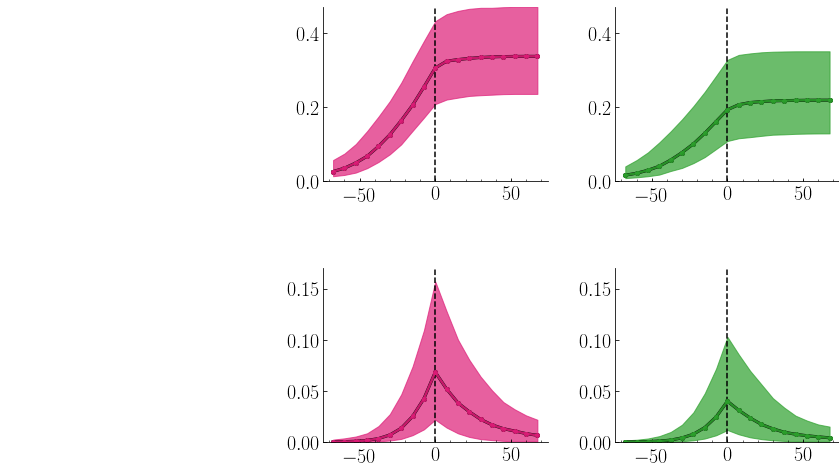

In [42]:
im = Image.open('../dendintem2.png')
im2 = Image.open('../legend2.png')

fig = figure(figsize=(14.5,8))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.3, hspace=0.5) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col
#axl0 = fig.add_subplot(gs[1, 0]) # first full col

ax4 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[0, 2]) # first row, third col
ax3 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax1 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col
#axl1 = fig.add_subplot(gs[1, 0]) # lower row, 1st col

color = redcolor
xt = -arange(0,10)*7.5
#axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color=color)
#axl1.plot(xt,mt,'k.-',linewidth=2)
#axl1.plot(xt,mt,color+'.-',label='Excitatory EPSP\n $V_{max}(\Delta x)/V_{max}(0)$',linewidth=2)
#axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color=color,alpha=0.9)
#axl1.plot(-xt,mtn,'k.-',linewidth=2)
#axl1.plot(-xt,mtn,color+'.-',linewidth=2)

axsp = 1
lab = 'Vspine'
color = 'C2'
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],color+'.-',label='Axo-spinous inhibitory shunt\n $SL(\Delta x)/SL(0)$')
#axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color=color,alpha=0.7)
#axl1.set_ylim(0,1.05)
#axl1.spines['left'].set_position(('data',0.0))
#axl1.spines['top'].set_color('none')
#axl1.spines['right'].set_color('none')
#axl1.set_xlabel('$\Delta x\, (\mu m)$')

#ax0.imshow(im)
ax0.set_axis_off()
#axl0.imshow(im2)
#axl0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(1-fapSf[:,1]/fapSf[:,0],51)
ht = histogram(1-fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(1-fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(1-fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0 = redcolor # red
# htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(h2[0])/sum(h2[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# # ax2.plot(htx,hty*myl,'k',linewidth=2.4)
# # ax2.plot(htx,hty*myl,color0,linewidth=2.4)

color0b = 'C1' # orange
# htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht2[0])/sum(ht2[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax2.plot(htx,hty*myl,'k-',linewidth=2)
# ax2.plot(htx,hty*myl,'-',c=color0b,linewidth=2)

color = 'C2' # green
# htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht[0])/sum(ht[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax2.plot(htx,hty*myl,'k',linewidth=2)
# ax2.plot(htx,hty*myl,color,linewidth=2)

color2= 'C0' # blue
# htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht3[0])/sum(ht3[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax2.plot(htx,hty*myl,'k-',linewidth=1.5)
# ax2.plot(htx,hty*myl,'-',c=color2,linewidth=1.5)
# ax2.spines['top'].set_color('none')
# ax2.spines['right'].set_color('none')

# #h2 = ax1.hist(fap0f[:,1]/fap0f[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
# #ht = ax1.hist(fap0f[:,2]/fap0f[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
# h2 = histogram(1-fap0f[:,1]/fap0f[:,0],51)
# ht = histogram(1-fap0f[:,2]/fap0f[:,0],51)
# ht2 = histogram(1-fap0f[:,5]/fap0f[:,3],51)
# ht3 = histogram(1-fap0f[:,4]/fap0f[:,3],51)

# myl = max([h2[0].max(),ht[0].max()])
# mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
# myl = 1.0

# case1 = 'Axo-dendritic inhibition,\nEPSP in spine A'
# case1 = 'Case 1'
# htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht3[0])/sum(ht3[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax1.plot(htx,hty*myl,'k-',linewidth=2)
# ax1.plot(htx,hty*myl,'-',c=color2,linewidth=2,label=case1)



# case3 = 'Axo-spinous inhibition,\nEPSP in spine A'
# case3 = 'Case 3'
# htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht2[0])/sum(ht2[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax1.plot(htx,hty*myl,'k-',linewidth=2)
# ax1.plot(htx,hty*myl,'-',c=color0b,linewidth=2,label=case3)

# case4 = 'Axo-spinous inhibition,\nEPSP in spine B'
# case4 = 'Case 4'
# htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
# hty = cumsum(ht[0])/sum(ht[0])
# #htx = concatenate(([mxl[0]],htx,[1.0]))
# htx = concatenate(([0],htx,[1.0]))
# hty = concatenate(([0],hty,[1.0]))
# ax1.plot(htx,hty*myl,'k',linewidth=2)
# ax1.plot(htx,hty*myl,color,linewidth=2,label=case4)
# ax1.spines['top'].set_color('none')
# ax1.spines['right'].set_color('none')


# ax1.set_xlim(0,1)
# ax1.set_ylabel('Distribution',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
# ax1.set_xlabel('$S_\\V$ in excited spine')

# ax2.set_xlim(0.,0.6)
# ax1.set_xlim(0.,0.6)

# ax2.set_xlabel('$S_\\V$ in soma')
# ax2.set_ylabel('Distribution',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
#ax1.annotate('Neighboring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.17,0.2))

# ax2.tick_params(which='major',direction='in')
# ax1.tick_params(which='major',direction='in')





axss = [ax3,ax4]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'.-',c=color0,linewidth=2.5,label='Axo-dendritic\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color = color0)
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')


# axsp = 1
# for i,lab in enumerate(['Vspine','Vsoma']):
#     axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
#     axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color+'.-',linewidth=2.5,label='Axo-spinous\n inhibition',markersize=8,alpha=0.9)
#     axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color=color)



ax4.tick_params(which='major',direction='in')
ax3.tick_params(which='major',direction='in')

ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
# ax3.set_xlabel('$\Delta x$ (\si{\micro\meter})')
yloc_offonpath = 0.21 
# ax3.annotate('off-path',xy = (-65,0.16))
# ax3.annotate('on-path',xy = (15,0.16))
# ax4.set_ylabel('$S_\\V(\Delta x)$ in soma',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
ax4.yaxis.set_label_coords(0.5,1.03)
# ax3.set_ylabel('$S_\\V(\Delta x)$ in excited spine',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
ax3.yaxis.set_label_coords(0.5,1.03)
ax4.set_ylim(0,0.47)
ax3.set_ylim(0,0.17)
# ax4.annotate('off-path',xy = (-65,0.4))
# ax4.annotate('on-path',xy = (15,0.4))

ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax3.tick_params(which='minor',direction='in')
ax4.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax4.tick_params(which='minor',direction='in')

ax4.yaxis.set_label_coords(0.02,1.1)
ax3.yaxis.set_label_coords(0.02,1.1)

ax4.vlines(0.0,0.,0.5,linestyle='--')
ax3.vlines(0.0,0.,0.2,linestyle='--')

axss = [ax1,ax2]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
# for i,lab in enumerate(['Vspine','Vsoma']):
#     axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
#     axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'.-',c=color0,linewidth=2.5,label='Axo-dendritic\n inhibition',markersize=8,alpha=0.9)
#     axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color = color0)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')


axsp = 1
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color+'.-',linewidth=2.5,label='Axo-spinous\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color=color)



ax2.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
# ax1.set_xlabel('$\Delta x$ (\si{\micro\meter})')
yloc_offonpath = 0.21 
# ax1.annotate('off-path',xy = (-65,0.16))
# ax1.annotate('on-path',xy = (15,0.16))
# ax2.set_ylabel('$S_\\V(\Delta x)$ in soma',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
ax2.yaxis.set_label_coords(0.5,1.03)
# ax1.set_ylabel('$S_\\V(\Delta x)$ in excited spine',rotation = 0 , 
#                horizontalalignment='left',
#                verticalalignment='top')
ax1.yaxis.set_label_coords(0.5,1.03)
ax2.set_ylim(0,0.47)
ax1.set_ylim(0,0.17)
# ax2.annotate('off-path',xy = (-65,0.4))
# ax2.annotate('on-path',xy = (15,0.4))

ax1.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax1.tick_params(which='minor',direction='in')
ax2.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax2.tick_params(which='minor',direction='in')

ax2.yaxis.set_label_coords(0.02,1.1)
ax1.yaxis.set_label_coords(0.02,1.1)

ax2.vlines(0.0,0.,0.5,linestyle='--')
ax1.vlines(0.0,0.,0.2,linestyle='--')



#ax1.legend(loc=(-0.6,0.1))

savefig('ODP-f3v2_B.pdf',dpi = 300,tight_layout = True)